In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/src")

import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from conf.database import db

Connecting to database.
Connection successful.


In [17]:
start_time = "2020-09-01 00:00:00"
end_time = "2021-03-31 23:00:00"

In [33]:
df = pd.read_csv("../data/topcliffe.csv")
df = df[["Date time", "Precipitation"]]
df["Datetime"] = pd.to_datetime(df["Date time"], format="%m/%d/%Y %H:%M:%S")
df = df.drop("Date time", axis=1)
df = df.set_index("Datetime").sort_index()
df = df[start_time:end_time]
# df = df.reset_index()
# db['topcliffe_rain'].insert_many(df.to_dict("records"))
df

Precipitation
Datetime                          
2020-09-01 00:00:00            0.0
2020-09-01 01:00:00            0.0
2020-09-01 02:00:00            0.0
2020-09-01 03:00:00            0.0
2020-09-01 04:00:00            0.0
...                            ...
2021-03-31 19:00:00            0.0
2021-03-31 20:00:00            0.0
2021-03-31 21:00:00            0.0
2021-03-31 22:00:00            0.0
2021-03-31 23:00:00            0.0

[5088 rows x 1 columns]

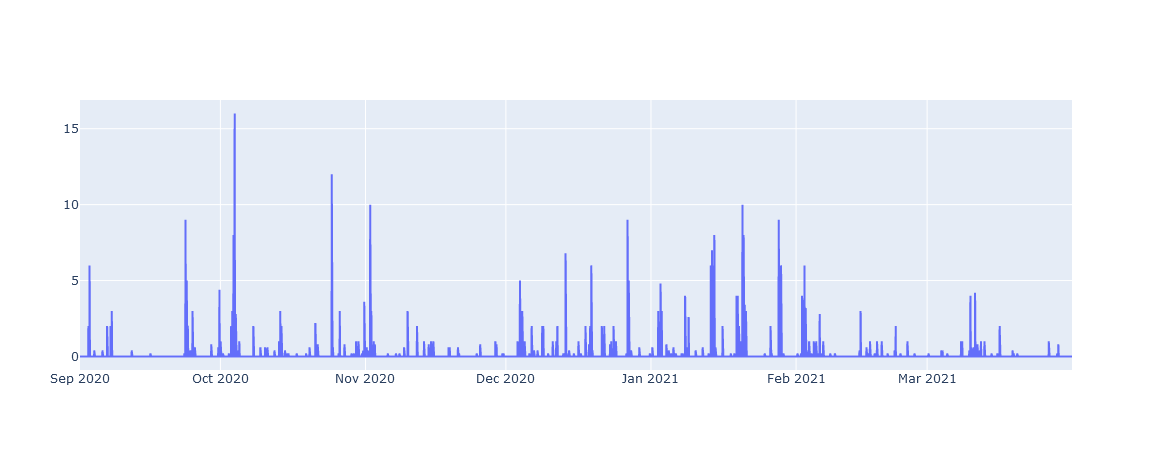

In [34]:
fig = make_subplots(
    rows=1,
    cols=1,
)

fig.add_trace(
go.Scatter(x=df.index, y=df.Precipitation,), row=1, col=1
)
fig.show()

In [32]:
pd.DataFrame(db['topcliffe_rain'].find({}, {"_id":0}))

Datetime  Precipitation
0    2020-09-01 00:00:00            0.0
1    2020-09-01 01:00:00            0.0
2    2020-09-01 02:00:00            0.0
3    2020-09-01 03:00:00            0.0
4    2020-09-01 04:00:00            0.0
...                  ...            ...
5083 2021-03-31 19:00:00            0.0
5084 2021-03-31 20:00:00            0.0
5085 2021-03-31 21:00:00            0.0
5086 2021-03-31 22:00:00            0.0
5087 2021-03-31 23:00:00            0.0

[5088 rows x 2 columns]